In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Downloads/Womens Clothing E-Commerce Reviews.csv",index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.rename(columns={'Clothing ID':'Clothing_ID','Review Text':'Review_Text',"Recommended IND":"Recommended_IND","Positive Feedback Count":"Positive_Feedback_Count","Division Name":"Division_Name","Department Name":"Department_Name","Class Name":"Class_Name"},inplace=True)

In [4]:
df.describe()

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [5]:
df['Review_Text']=df['Review_Text'].astype(str)
df['Review_Length']=df['Review_Text'].apply(len)

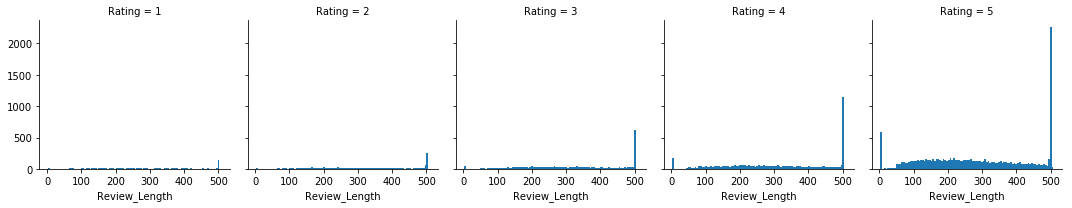

In [6]:

grid=sns.FacetGrid(data=df, col='Rating')

grid.map(plt.hist,'Review_Length',bins=100)

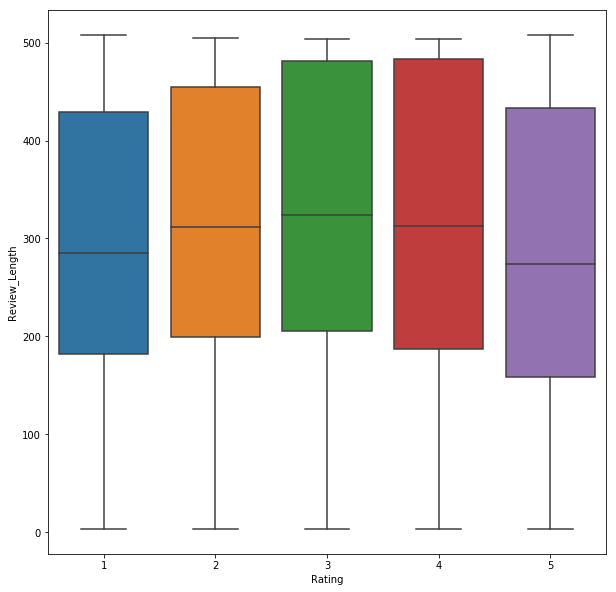

In [7]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Rating', y='Review_Length', data=df)

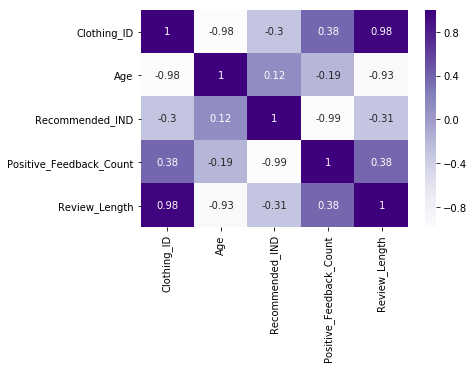

In [8]:
rating = df.groupby('Rating').mean()
cor=rating.corr()
sns.heatmap(cor, xticklabels=cor.columns.values,yticklabels=cor.columns.values,cmap="Purples",annot=True)

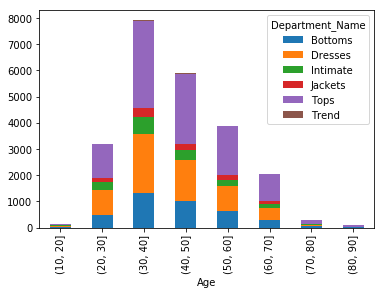

In [46]:
df.groupby(['Department_Name', pd.cut(df['Age'], np.arange(0,100,10))]).size().unstack(0).plot.bar(stacked=True)


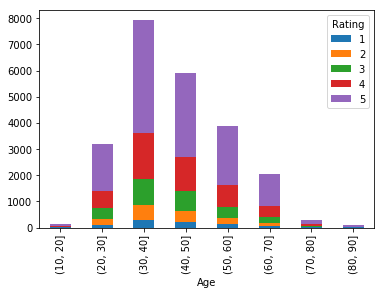

In [47]:
df.groupby(['Rating', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

Text(0.5,1,'Counts Vs Division Name')

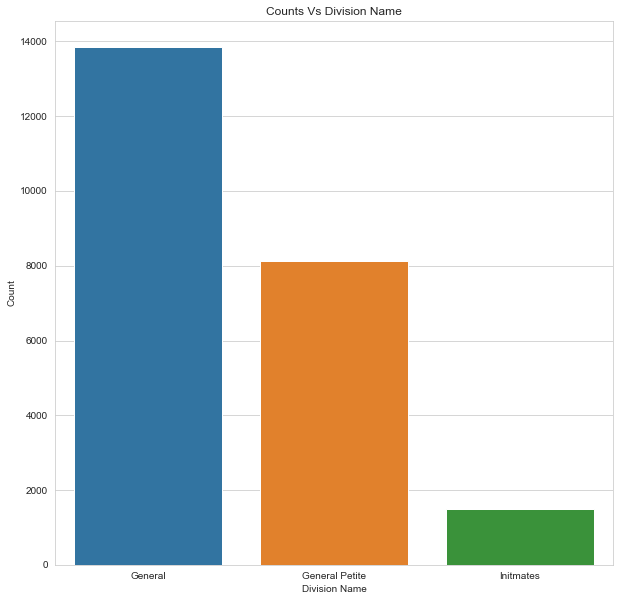

In [63]:
w=df.groupby(by=['Division_Name'],as_index=False).count().sort_values(by='Class_Name',ascending=False)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=w['Division_Name'],y=w['Class_Name'], data=w)
plt.xlabel("Division Name")
plt.ylabel("Count")
plt.title("Counts Vs Division Name")

Text(0.5,1,'Counts Vs Department Name')

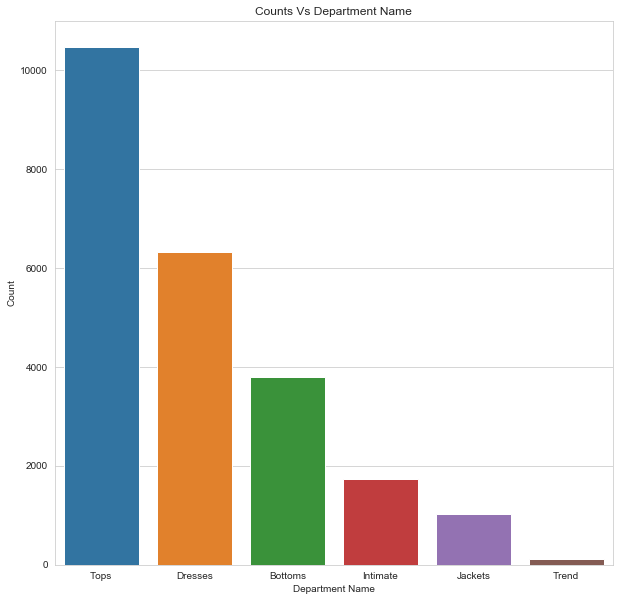

In [62]:
z=df.groupby(by=['Department_Name'],as_index=False).count().sort_values(by='Class_Name',ascending=False)
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=z['Department_Name'],y=z['Class_Name'], data=z)
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.title("Counts Vs Department Name")
